# Finding New Prospects for Your Non-Profit

#### Every non-profit organization needs a constant stream of new donor prospects. The goal of this project is to increase the revenue of a non-profit organization by using Machine Learning Supervised Algorithms.

#### The analysis of the data was created based on the below criteria:
##### A)The new prospect should match the oraganization's goals.
##### B)The new prospect must have the capacity to donate. 
##### C)The new prospect should be reacheable.

##### The dataset obtained calculates the Median on several features and then are grouped by Zip Code. The data was obtained from 3 different databases. Two of them from Public Domain such as Census data and a private's non-profit organization database.


In [19]:
# Import libraries for the project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 


In [40]:
# Allows Visualualizations in IPYNB
%matplotlib inline

# Load data from the dataset
data = pd.read_csv(r"C:\Users\JBartra\Capstone\FinalData_ForModeling1_csv.csv")

# Inspecting a sample of the data
display(data.head(n=10))


,Mean_House_Price,Age_15_84,Work_Class,Med_Education,Med_Occupation,Weeklyhrs,MedianIncome,Sate,City,Country
0,10000,19288,9347,837,245,39.5,22261,Michigan,Flint,United States
1,11500,22511,12779,961,325,40.3,21181,Michigan,Detroit,United States
2,11500,22511,12779,961,325,40.3,21181,Michigan,Highland Park,United States
3,12000,4197,2782,208,69,38.0,20653,Ohio,Cleveland,United States
4,12500,6372,3444,287,129,37.7,24103,Michigan,Detroit,United States
5,13000,7811,4736,338,183,49.6,23117,Missouri,Saint Louis,United States
6,14000,19999,13159,847,251,40.7,22561,Wisconsin,Milwaukee,United States
7,16000,21309,11594,836,327,35.3,21372,Michigan,Detroit,United States
8,16000,27655,15863,1189,343,39.1,24770,Michigan,Detroit,United States
9,16500,16172,10682,837,242,40.3,23789,Missouri,Saint Louis,United States


In [41]:
#Display total number of records
n_records = len(data.index) 

#Number of records where the median income is more than $60,000
n_greater_60k = len(data[data['MedianIncome'] >= 60000]) 

#Number of records where the median income is at most $60,000
n_at_most_60k = len(data[data['MedianIncome'] <= 60000])

#Percentage of the median income greater than $60,000
greater_percent = (float(n_greater_60k)*100)/ n_records

# Print the results
print("Total number of records in the dataset: {}".format(n_records))
print("Zip Code where median income is greater $60,000: {}".format(n_greater_60k))
print("Zip Code where median income is at most $60,000: {}".format(n_at_most_60k))
print("Percentage of median income by zip code making more than $60,000: {}%".format(greater_percent))

Total number of records: 8996
Zip Code where median income is greater $60,000: 4783
Zip Code where median income is at most $60,000: 4215
Percentage of median by zip code making more than $60,000: 53.1680746999%


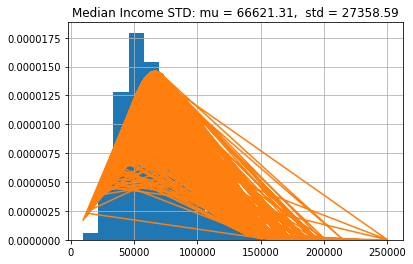

In [42]:
# Checking the distribution of the Income feature
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

h = data['MedianIncome']

hmean = np.mean(h)
hstd = np.std(h)
pdf = stats.norm.pdf(h, hmean, hstd)
plt.hist(h,bins=20,normed=True)
title = "Median Income STD: mu = %.2f,  std = %.2f" % (hmean, hstd)
plt.title(title)
plt.grid(True)
plt.plot(h, pdf) 

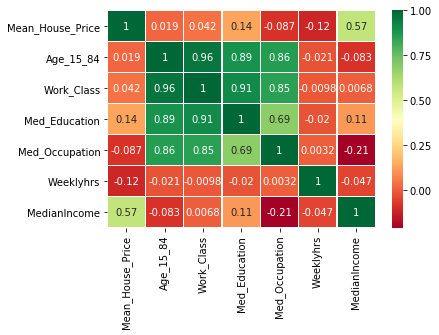

In [68]:
# Checking Correlation between features before anything else is done
import seaborn as sns
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn',linewidths=0.30)

Preparing the Data
Transform skewed continuos data

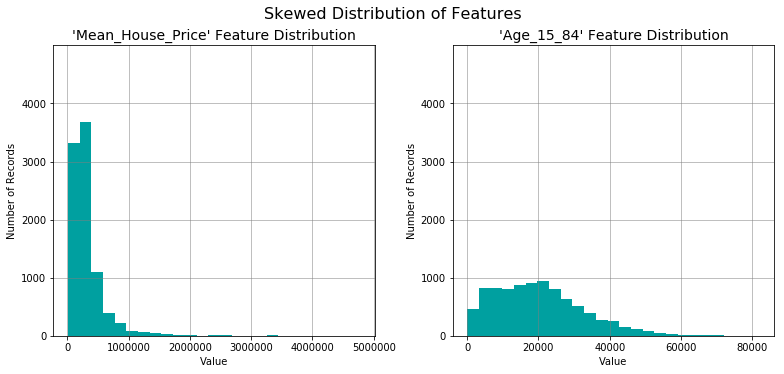

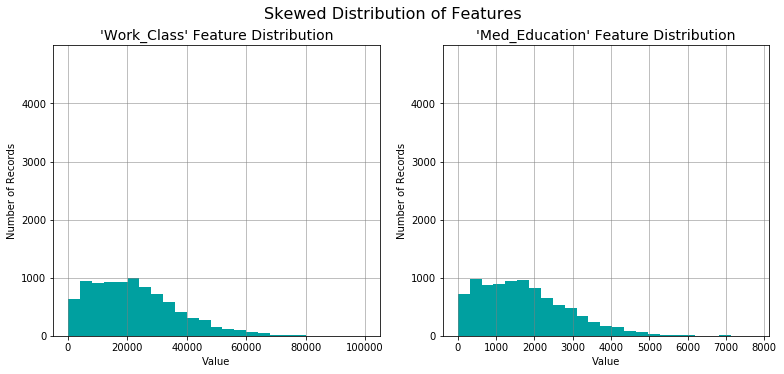

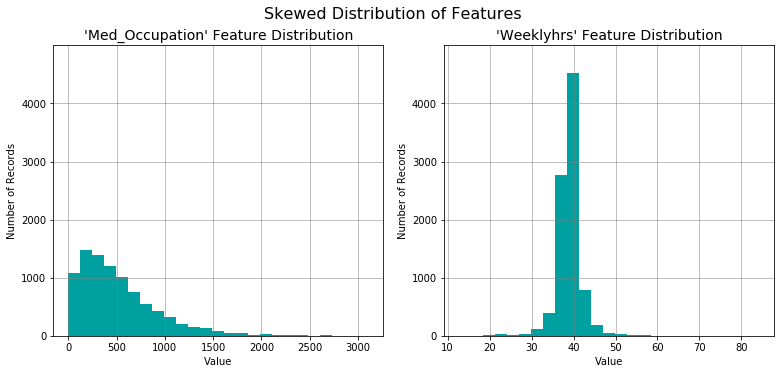

In [53]:
# Split the data into features and target label
import vvisuals as ext
##test=data.drop('hrsperweek', axis=1)
#data.hrsperweek = data.hrsperweek.fillna('0')
income_raw = data['MedianIncome']
features_raw = data.drop('MedianIncome', axis = 1)

#Visualize the negative and postive data skewness
ext.skewness(data)
ext.skewness1(data)
ext.skewness2(data)

#### Most of the features in the dataset are highly skewed therefore it needs to be transformed. Asymetry is not desired.

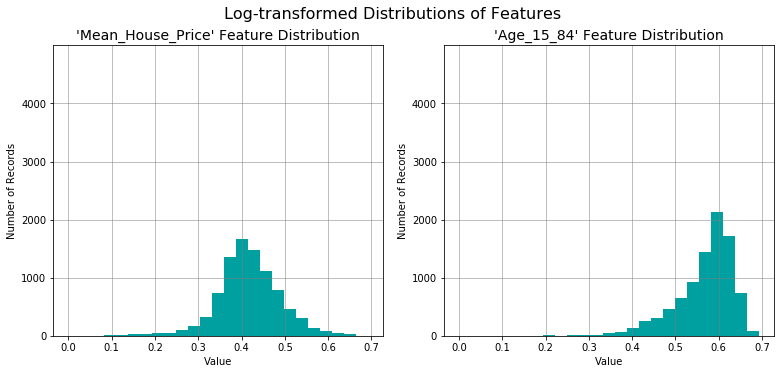

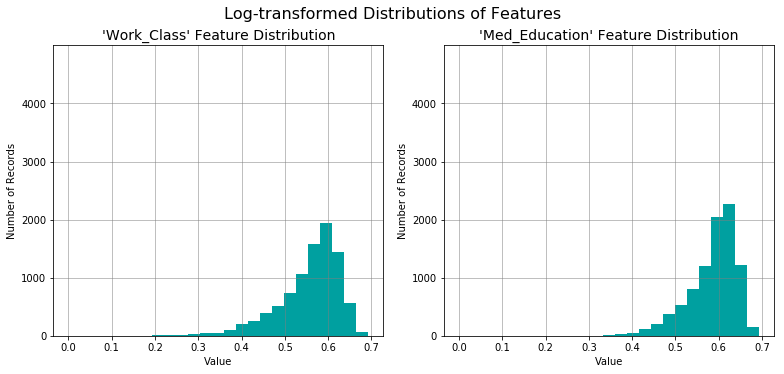

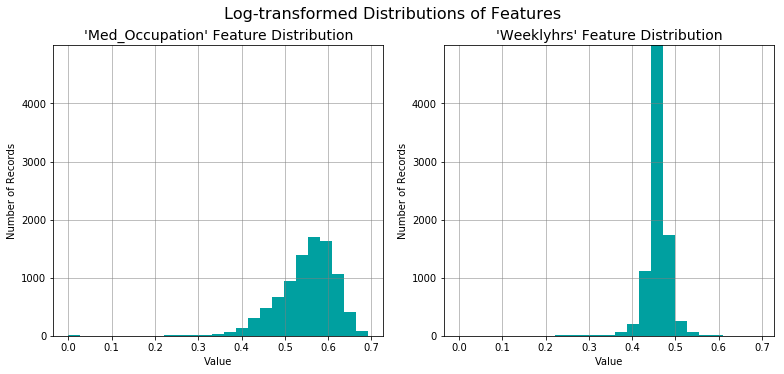

In [65]:
# Log-transform the skewed features
skewed = ['Mean_House_Price','Age_15_84','Work_Class', 'Med_Education', 'Med_Occupation','Weeklyhrs']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new the new feature distributions
ext.skewness(features_log_transformed, transformed = True)
ext.skewness1(features_log_transformed, transformed = True)
ext.skewness2(features_log_transformed, transformed = True)

#### Normalizing the data

In [55]:
#Use sklearn 
from sklearn.preprocessing import MinMaxScaler
#Using the default scaler
scaler = MinMaxScaler() 
numerical = ['Mean_House_Price','Age_15_84','Work_Class', 'Med_Education', 'Med_Occupation','Weeklyhrs']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show scaling results in the dataset
display(features_log_minmax_transform.head(n = 10))


,Mean_House_Price,Age_15_84,Work_Class,Med_Education,Med_Occupation,Weeklyhrs,Sate,City,Country
0,0.000000,0.796898,0.665419,0.751666,0.684513,0.593074,Michigan,Flint,United States
1,0.022652,0.818585,0.709579,0.767076,0.719522,0.603777,Michigan,Detroit,United States
2,0.022652,0.818585,0.709579,0.767076,0.719522,0.603777,Michigan,Highland Park,United States
3,0.029549,0.582863,0.494318,0.596589,0.528242,0.572424,Ohio,Cleveland,United States
4,0.036166,0.641457,0.524453,0.632394,0.605212,0.568199,Michigan,Detroit,United States
5,0.042522,0.670032,0.569427,0.650601,0.648406,0.714900,Missouri,Saint Louis,United States
6,0.054533,0.801978,0.713717,0.752990,0.687509,0.609051,Wisconsin,Milwaukee,United States
7,0.076176,0.810883,0.695838,0.751532,0.720282,0.533169,Michigan,Detroit,United States
8,0.076176,0.847469,0.740106,0.790828,0.726204,0.587643,Michigan,Detroit,United States
9,0.081163,0.772168,0.684270,0.751666,0.682987,0.603777,Missouri,Saint Louis,United States


In [56]:
# Applying One-hot encode 
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'income_raw' data using the same scale range applied in the previous step
income = income_raw.apply(lambda x: 1 if x <= 60000 else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Display the encoded features in the dataset
print(encoded)

4385 total features after one-hot encoding.
['Mean_House_Price', 'Age_15_84', 'Work_Class', 'Med_Education', 'Med_Occupation', 'Weeklyhrs', 'Sate_Alabama', 'Sate_Arizona', 'Sate_Arkansas', 'Sate_California', 'Sate_Colorado', 'Sate_Delaware', 'Sate_District of Columbia', 'Sate_Florida', 'Sate_Georgia', 'Sate_Hawaii', 'Sate_Idaho', 'Sate_Illinois', 'Sate_Indiana', 'Sate_Iowa', 'Sate_Kansas', 'Sate_Kentucky', 'Sate_Louisiana', 'Sate_Maryland', 'Sate_Michigan', 'Sate_Minnesota', 'Sate_Mississippi', 'Sate_Missouri', 'Sate_Nebraska', 'Sate_Nevada', 'Sate_New Mexico', 'Sate_New York', 'Sate_North Carolina', 'Sate_Ohio', 'Sate_Oklahoma', 'Sate_Oregon', 'Sate_Pennsylvania', 'Sate_South Carolina', 'Sate_Tennessee', 'Sate_Texas', 'Sate_Utah', 'Sate_Virginia', 'Sate_Washington', 'Sate_West Virginia', 'Sate_Wisconsin', 'City_Aberdeen', 'City_Abilene', 'City_Abingdon', 'City_Abington', 'City_Abita Springs', 'City_Accokeek', 'City_Acton', 'City_Acworth', 'City_Ada', 'City_Adairsville', 'City_Adamstow

#### Split the Data into Test and Training sets

In [57]:
#Use SKlearn to splitt the data
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 7196 samples.
Testing set has 1800 samples.


#### Creating the Naive Predictor as the basis to compare the model

In [58]:
from sklearn.metrics import accuracy_score
#The naive model always predict that an individual make more than 60,000 
naive_prediction = [1 for i in range(len(income))]
accuracy = accuracy_score(income,naive_prediction)

#Calculating F-score beta = 0.5
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(y_true=income,y_pred=naive_prediction)
recall =recall_score(y_true=income,y_pred=naive_prediction)
beta = 0.5

fscore = (1+beta**2)*(precision*recall)/(beta**2*precision+recall)

# Print the results
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.4685, F-score: 0.5243]


#### Creating the Performance Metrics for ADABOOST, SVC and Decision Trees models

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
       
    results = {}
    
    # Fit the learner
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Print Results
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

#### Model Evaluation

AdaBoostClassifier trained on 71 samples.
AdaBoostClassifier trained on 719 samples.
AdaBoostClassifier trained on 7196 samples.
SVC trained on 71 samples.
SVC trained on 719 samples.
SVC trained on 7196 samples.
DecisionTreeClassifier trained on 71 samples.
DecisionTreeClassifier trained on 719 samples.
DecisionTreeClassifier trained on 7196 samples.


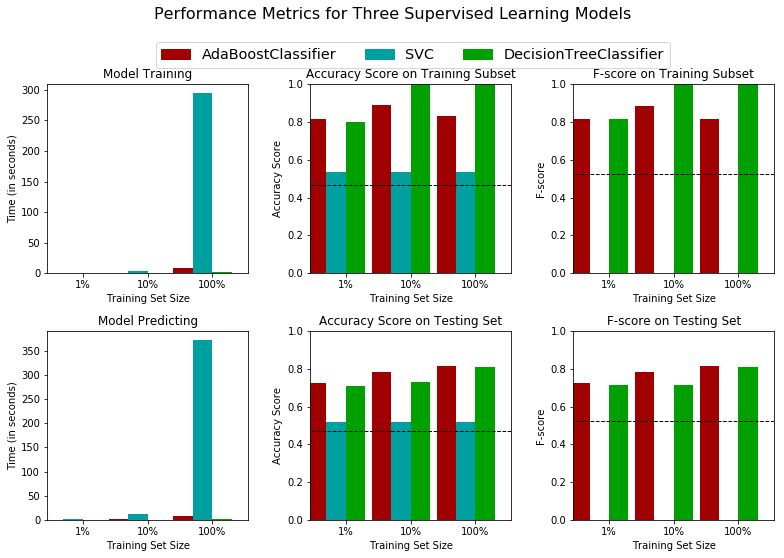

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
    
# Initialize the three models
clf_A = AdaBoostClassifier()
clf_B = SVC()
clf_C = ()

# Calculating the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Visualization for the 3 models
ext.evaluate(results, accuracy, fscore)

#### Improving Results

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#Initialize 
clf = AdaBoostClassifier()

#Adding parameters
parameters = {'n_estimators':[75,250], 'learning_rate':[0.1,0.25,0.5,0.75,1]}

#Make an fbeta_score 
scorer = make_scorer(fbeta_score, beta=0.5)

#Perform grid search on the classifier 
grid_obj = GridSearchCV(clf, parameters, scorer)

#Fit the grid search object to the training data 
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the results
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8122
F-score on testing data: 0.8131

Optimized Model
------
Final accuracy score on the testing data: 0.8294
Final F-score on the testing data: 0.8305


##### Visualizing 5 of the most 'Critical Features' of Successful Supervised Model

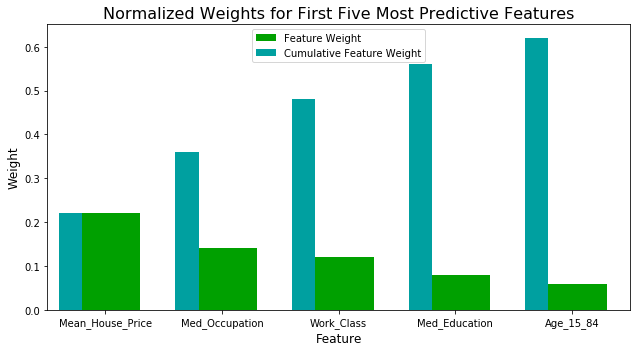

In [62]:
model = AdaBoostClassifier(random_state=10).fit(X_train, y_train)

#Extract the feature importances 
importances = model.feature_importances_

# Visualize the Plot
ext.feature_plot(importances, X_train, y_train)

#### Using the feature of importance to train the model

In [64]:
# Cloning the model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on ADABOOST since it works best on the dataset 
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Calculate scores 
reduced_predictions = clf.predict(X_test_reduced)

# Report scores 
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8294
F-score on testing data: 0.8305

Final Model trained on reduced data
------
Accuracy on testing data: 0.7961
F-score on testing data: 0.7940


### Conclusion
Accuracy and F Score are reduced by using only certain features from the dataset. In this case it is better to use all the fetaures in the dataset rather than reduce them. More explanations are in the Project Report.